In [1]:
import os
import sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

sys.path.insert(1, os.path.join(sys.path[0], '..'))
from h06_results.plot_correlations import read_results
from util import constants
from util import util

# Load Correlations

In [2]:
checkpoints_path = '../../checkpoint'
df = read_results(checkpoints_path)

In [3]:
df.head(10)

,language,n_types_frequency_experiment,n_types_wordnet,n_types_polysemy_natural,n_types_polysemy_polyassign,natural_frequency_corr,natural_frequency_corr--pvalue,fcfs_frequency_corr,fcfs_frequency_corr--pvalue,polyfcfs_frequency_corr,...,natural_polysemy_corr--pvalue,fcfs_polysemy_corr,fcfs_polysemy_corr--pvalue,polyfcfs_polysemy_corr,polyfcfs_polysemy_corr--pvalue,caplan_polysemy_corr,caplan_polysemy_corr--pvalue,polycaplan_polysemy_corr,polycaplan_polysemy_corr--pvalue,seed
0,en,106121,6785,8482,9416,-0.066639,1.012433e-104,-0.061882,1.534372e-90,-0.035426,...,5.116825e-52,-0.047691,1.112519e-05,-0.054245,1.387318e-07,0.009113,0.401386,-0.008907,0.387457,0
0,fi,239858,2054,11321,9582,-0.252442,0.000000e+00,-0.059455,9.947511e-187,-0.044186,...,8.742217e-90,-0.058306,5.353952e-10,-0.045963,6.761970e-06,0.002453,0.794094,0.019172,0.060574,0
0,he,132095,0,14076,10167,-0.256244,0.000000e+00,-0.095168,2.460330e-263,-0.064023,...,1.953583e-131,-0.063210,6.087703e-14,-0.053949,5.236440e-08,-0.018864,0.025217,-0.006582,0.506969,0
0,id,107821,4179,8960,12947,-0.110769,1.978407e-291,-0.031520,4.079043e-25,-0.027411,...,2.415402e-08,-0.010065,3.407951e-01,-0.010110,2.500312e-01,0.018802,0.075128,0.020546,0.019398,0
0,pt,129919,3181,9032,10052,-0.089011,9.741077e-227,-0.051253,2.685471e-76,-0.035644,...,1.390108e-49,-0.019341,6.605380e-02,-0.023952,1.632899e-02,-0.004214,0.688837,0.005088,0.609989,0
0,tr,146540,0,11640,10750,-0.174278,0.000000e+00,-0.050936,8.859210e-85,-0.037220,...,5.824344e-118,-0.045909,7.227292e-07,-0.025806,7.455845e-03,-0.005748,0.535209,-0.007837,0.416507,0
0,en,106241,6776,8484,9143,-0.069200,6.464525e-113,-0.069807,7.093606e-115,-0.038767,...,7.524842e-43,-0.040259,2.079524e-04,-0.051909,6.830283e-07,-0.015667,0.149047,-0.006632,0.526045,1
0,fi,241562,2034,11399,9739,-0.246287,0.000000e+00,-0.063824,1.992231e-216,-0.047239,...,2.016320e-109,-0.060213,1.244490e-10,-0.041031,5.113055e-05,0.000401,0.965826,-0.000781,0.938606,1
0,he,132751,0,14021,10177,-0.254346,0.000000e+00,-0.096464,7.305928e-272,-0.069256,...,4.029131e-124,-0.048046,1.255934e-08,-0.054330,4.151305e-08,-0.005933,0.482385,-0.004890,0.621852,1
0,id,106602,4211,9005,13121,-0.107476,2.622576e-271,-0.039782,1.324080e-38,-0.030009,...,5.650098e-09,-0.016779,1.113517e-01,-0.020502,1.885285e-02,-0.012443,0.237728,0.016599,0.057257,1


# Plot Frequencies vs Length

In [4]:
df['Language'] = df['language'].apply(lambda x: constants.LANG_NAMES[x])
df['Natural'] = df['natural_frequency_corr']
df['FCFS'] = df['fcfs_frequency_corr']
df['PolyFCFS'] = df['polyfcfs_frequency_corr']
df['Caplan'] = df['caplan_frequency_corr']
df['PolyCaplan'] = df['polycaplan_frequency_corr']
df['IID'] = df['caplan_polysemy_corr']
df['PolyIID'] = df['polycaplan_polysemy_corr']

df_frequency = pd.melt(df, id_vars=['Language', 'seed'], var_name='Text', value_name='Correlation',
             value_vars=['Natural', 'FCFS', 'PolyFCFS', 'IID', 'PolyIID'])

df_frequency['Correlation (%)'] = df_frequency['Correlation'] * 100

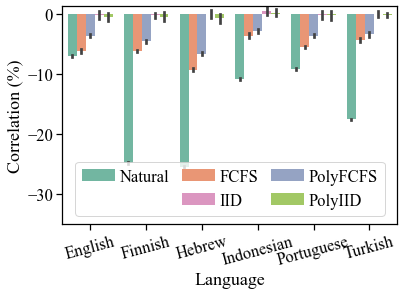

In [5]:
fig = plt.figure()
ax = sns.barplot(x="Language", y="Correlation (%)", hue="Text", data=df_frequency)
ax.plot([2], [-5], '-', color='none', label=' ')

# plt.ylim([-31, 1])
plt.xlim([-.5, 5.5])
plt.ylim([-35, 1.3])

handles, labels = ax.get_legend_handles_labels()
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: constants.LEGEND_ORDER[t[0]]))
# plt.legend(handles, labels, loc='lower center', ncol=3, handletextpad=.5, columnspacing=1.2)
plt.legend(handles, labels, loc='lower center', ncol=3, handletextpad=.3, columnspacing=.75)

_ = plt.xticks(rotation=15)

# Plot Polysemy vs Length

In [6]:
df['Language'] = df['language'].apply(lambda x: constants.LANG_NAMES[x])
df['Natural'] = df['natural_polysemy_corr']
df['FCFS'] = df['fcfs_polysemy_corr']
df['PolyFCFS'] = df['polyfcfs_polysemy_corr']
df['Caplan'] = df['caplan_polysemy_corr']
df['PolyCaplan'] = df['polycaplan_polysemy_corr']
df['IID'] = df['caplan_polysemy_corr']
df['PolyIID'] = df['polycaplan_polysemy_corr']

df_polysemy = pd.melt(df, id_vars=['Language', 'seed'], var_name='Text', value_name='Correlation',
             value_vars=['Natural', 'FCFS', 'PolyFCFS', 'IID', 'PolyIID'])
df_polysemy['Correlation (%)'] = df_polysemy['Correlation'] * 100

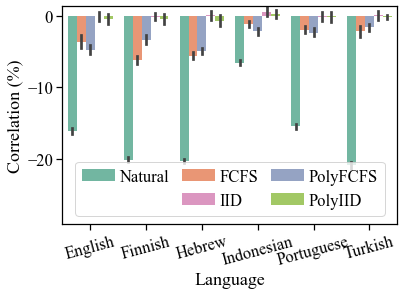

In [7]:
fig = plt.figure()
ax = sns.barplot(x="Language", y="Correlation (%)", hue="Text", data=df_polysemy)
ax.plot([2], [-5], '-', color='none', label=' ')
# mpl.lines.Line2D([0], [0], color="none", label=' haha')

# plt.ylim([-26, 1.5])
plt.xlim([-.5, 5.5])
plt.ylim([-29, 1.3])
# plt.ylim([-27, 2.5])

handles, labels = ax.get_legend_handles_labels()
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: constants.LEGEND_ORDER[t[0]]))
plt.legend(handles, labels, loc='lower center', ncol=3, handletextpad=.3, columnspacing=.75)

_ = plt.xticks(rotation=15)

# Permutation Tests

In [8]:
print()
print('FCFS vs Natural frequency--length')
for language in constants.LANGUAGES:
    df_lang = df[df.language == language]
    
    pvalue = util.permutation_test(
        (df_lang.fcfs_frequency_corr - df_lang.natural_frequency_corr).to_numpy())
    print('\t%s. \t%.4f' % (constants.LANG_NAMES[language], pvalue))

print()


FCFS vs Natural frequency--length
	English. 	0.0039
	Finnish. 	0.0000
	Hebrew. 	0.0000
	Indonesian. 	0.0000
	Portuguese. 	0.0000
	Turkish. 	0.0000



In [9]:
print()
print('PolyFCFS vs Natural polysemy--length')
for language in constants.LANGUAGES:
    df_lang = df[df.language == language]
    
    pvalue = util.permutation_test(
        (df.polyfcfs_polysemy_corr - df.natural_polysemy_corr).to_numpy())
    print('\t%s. \t%.4f' % (constants.LANG_NAMES[language], pvalue))

print()


PolyFCFS vs Natural polysemy--length
	English. 	0.0000
	Finnish. 	0.0000
	Hebrew. 	0.0000
	Indonesian. 	0.0000
	Portuguese. 	0.0000
	Turkish. 	0.0000

